In [2]:
''' Imports '''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gizmo_analysis as gizmo
import utilities as ut
import time as t
import gc
from astropy.stats import histogram
import sys

In [3]:
### LOADING AND READING IN THE SIMULATION (FIRST SNAPSHOT) ###

#simname = '/scratch/04712/tg840119/m12i_m7e3_HD_fire3_fireBH_Sep052021_hr_crdiffc690_sdp1e10_gacc31_fa0.5'                                                         
#simdir = '/scratch/04712/tg840119/m12i_m7e3_HD_fire3_fireBH_Sep052021_hr_crdiffc690_sdp1e10_gacc31_fa0.5'

#part = gizmo.io.Read.read_snapshots(['star','gas'],'index', 200 , simulation_name=simname, simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)

In [4]:
outpath = '/work2/08006/dbenton/stampede3/feh/quarter_z/'

In [5]:
#bins = np.loadtxt('feh_bins.txt')
#counts = np.loadtxt('feh_counts.txt')
#plt.hist(bins[:-1], bins, weights=counts, log=True)
#plt.savefig('hist_out')

In [6]:
t1 = t.time()

diffuse_low_feh = np.loadtxt(outpath + 'diffuse_low_feh475_501.txt')
diffuse_high_feh = np.loadtxt(outpath + 'diffuse_high_feh475_501.txt')


dense_low_feh = np.loadtxt(outpath + 'dense_low_feh475_501.txt')
dense_high_feh = np.loadtxt(outpath + 'dense_high_feh475_501.txt')
#dense_low_feh475_501.txt
#dense_high_feh475_501.txt

t2 = t.time()
print(t2 - t1)

0.5270240306854248


In [7]:
min_low_feh = np.min(np.array(np.min(dense_low_feh),np.min(diffuse_low_feh)))
max_low_feh = np.max(np.array(np.max(dense_low_feh),np.max(diffuse_low_feh)))
min_high_feh = np.min(np.array(np.min(dense_high_feh),np.min(diffuse_high_feh)))
max_high_feh = np.max(np.array(np.max(dense_high_feh),np.max(diffuse_high_feh)))


print(len(diffuse_low_feh))
print(len(dense_low_feh))
print(len(diffuse_high_feh))
print(len(dense_high_feh))


bin_edges_low_feh = np.geomspace(min_low_feh, max_low_feh, 31)
bin_edges_high_feh = np.geomspace(min_high_feh, max_high_feh, 31)


counts_low_feh, bins_low_feh = histogram(dense_low_feh, bins = bin_edges_low_feh)
diff_counts_low_feh, bins_low_feh = histogram(diffuse_low_feh, bins = bin_edges_low_feh)
counts_high_feh, bins_high_feh = histogram(dense_high_feh, bins = bin_edges_high_feh)
diff_counts_high_feh, bins_high_feh = histogram(diffuse_high_feh, bins = bin_edges_high_feh)


frac_counts_low_feh = counts_low_feh/(counts_low_feh+diff_counts_low_feh)
print(frac_counts_low_feh)
frac_counts_high_feh = counts_high_feh/(counts_high_feh+diff_counts_high_feh)
print(frac_counts_high_feh)

binwidth_low_feh = bin_edges_low_feh[1] - bin_edges_low_feh[0]
bin_middles_low_feh = bin_edges_low_feh[0:-1] + binwidth_low_feh/2.
binwidth_high_feh = bin_edges_high_feh[1] - bin_edges_high_feh[0]
bin_middles_high_feh = bin_edges_high_feh[0:-1] + binwidth_high_feh/2.

554782
3192
9102
9472
[0.00315841 0.03361793 0.14794521 0.32428765 0.46511628 0.52097902
 0.50996016 0.56422018 0.59487179 0.63070539 0.65925926 0.72340426
 0.75223881 0.74486804 0.76635514 0.68992248 0.58247423 0.53072626
 0.48333333 0.51162791 0.47692308 0.37837838 0.25       0.1
 0.27777778 0.5        0.5        0.         0.         1.        ]
[0.06007067 0.1744186  0.39837398 0.51282051 0.57894737 0.68674699
 0.70909091 0.80952381 0.76642336 0.86092715 0.88636364 0.85964912
 0.88123515 0.91342756 0.92339833 0.93280182 0.94305019 0.9358047
 0.94646272 0.93984962 0.93298969 0.93461538 0.93154034 0.94202899
 0.9244186  0.92857143 0.96774194 0.91666667 1.         1.        ]


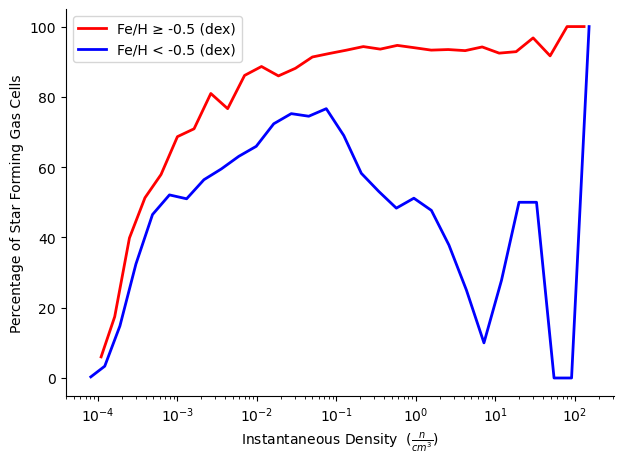

In [8]:
fig, ax = plt.subplots()

ax.plot(bin_middles_high_feh, (frac_counts_high_feh*100.0), label='Fe/H ≥ -0.5 (dex)', color='red', linewidth = 2)
ax.plot(bin_middles_low_feh, (frac_counts_low_feh*100.0), label='Fe/H < -0.5 (dex)', color='blue', linewidth=2)

#snap 200 is 6.432 Gyr
#snap 250 is 8.319 Gyr
#snap 300 is 10.171 Gyr
ax.set_xlabel(r'Instantaneous Density $\ (\frac{n}{cm^{3}})$')
ax.set_ylabel('Percentage of Star Forming Gas Cells')

#ax.set_xlim(5e-5, max_)
#ax.set_ylim(0, 100)
ax.set_xscale('log')


ax.legend(loc='upper left')

# Customize tick labels
#ax.xaxis.set_major_locator(plt.MultipleLocator(base=np.pi / 2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{int(val/np.pi)}π'))

# Customize fonts and font sizes
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

# Customize the plot background and frame
#ax.set_facecolor('lightgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add text box
#plt.text(0.65, 0.25, 'm12i FIRE-3 disk\nFe/H ≥ -0.5 (dex)\nz = .5 - present day', transform=ax.transAxes, verticalalignment='top', bbox=dict(facecolor='white'))
#plt.text(0.05, 0.95, 'm12i FIRE-3 disk\nFe/H < -0.5 (dex)\nz = .5 - present day', transform=ax.transAxes,verticalalignment='top', bbox=dict(facecolor='white'))
#top left = 0.05, 0.95
#bottom right = 0.65, 0.25



# Save the plot to a file (optional)
#plt.savefig(outpath + 'D_D_feh_disk',bbox_inches='tight')
plt.tight_layout()
# Display the plot
plt.show()

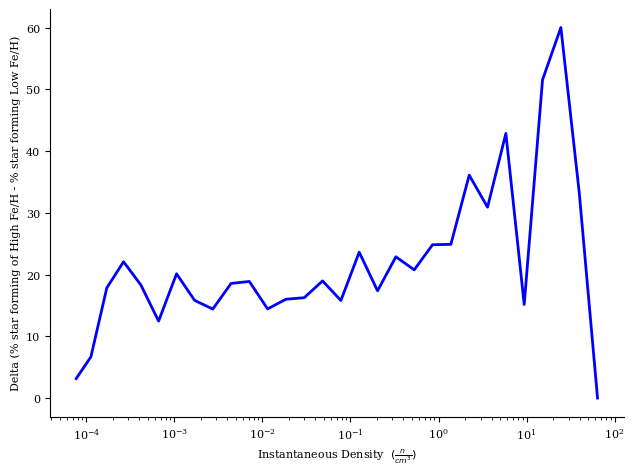

In [18]:
delta = frac_counts_high_feh - frac_counts_low_feh

fig, ax = plt.subplots()

ax.plot(bin_middles_low_feh, (delta*100), color='blue', linewidth = 2)
#ax.plot(bin_middles_high_feh, (delta*100), color='red', linewidth = 2)


#snap 200 is 6.432 Gyr
#snap 250 is 8.319 Gyr
#snap 300 is 10.171 Gyr
ax.set_xlabel(r'Instantaneous Density $\ (\frac{n}{cm^{3}})$')
ax.set_ylabel('Delta (% star forming of High Fe/H - % star forming Low Fe/H)')

#ax.set_xlim(5e-5, max_)
#ax.set_ylim(0, 100)
ax.set_xscale('log')


#ax.legend(loc='upper left')

# Customize tick labels
#ax.xaxis.set_major_locator(plt.MultipleLocator(base=np.pi / 2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{int(val/np.pi)}π'))

# Customize fonts and font sizes
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 8

# Customize the plot background and frame
#ax.set_facecolor('lightgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add text box
#plt.text(0.65, 0.25, 'm12i FIRE-3 disk\nFe/H ≥ -0.5 (dex)\nz = .5 - present day', transform=ax.transAxes, verticalalignment='top', bbox=dict(facecolor='white'))
#plt.text(0.05, 0.95, 'm12i FIRE-3 disk\nFe/H < -0.5 (dex)\nz = .5 - present day', transform=ax.transAxes,verticalalignment='top', bbox=dict(facecolor='white'))
#top left = 0.05, 0.95

# Save the plot to a file (optional)
#plt.savefig(outpath + 'delta_D_D_feh_low_feh_bins',bbox_inches='tight')
plt.tight_layout()
# Display the plot
plt.show()

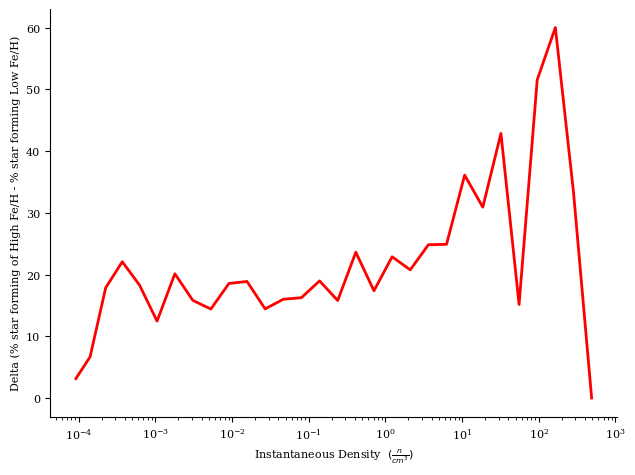

In [19]:
delta = frac_counts_high_feh - frac_counts_low_feh

fig, ax = plt.subplots()

#ax.plot(bin_middles_low_feh, (delta*100), color='blue', linewidth = 2)
ax.plot(bin_middles_high_feh, (delta*100), color='red', linewidth = 2)


#snap 200 is 6.432 Gyr
#snap 250 is 8.319 Gyr
#snap 300 is 10.171 Gyr
ax.set_xlabel(r'Instantaneous Density $\ (\frac{n}{cm^{3}})$')
ax.set_ylabel('Delta (% star forming of High Fe/H - % star forming Low Fe/H)')

#ax.set_xlim(5e-5, max_)
#ax.set_ylim(0, 100)
ax.set_xscale('log')


#ax.legend(loc='upper left')

# Customize tick labels
#ax.xaxis.set_major_locator(plt.MultipleLocator(base=np.pi / 2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{int(val/np.pi)}π'))

# Customize fonts and font sizes
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 8

# Customize the plot background and frame
#ax.set_facecolor('lightgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the plot to a file (optional)
#plt.savefig(outpath + 'delta_D_D_feh_high_feh_bins',bbox_inches='tight')
plt.tight_layout()
# Display the plot
plt.show()

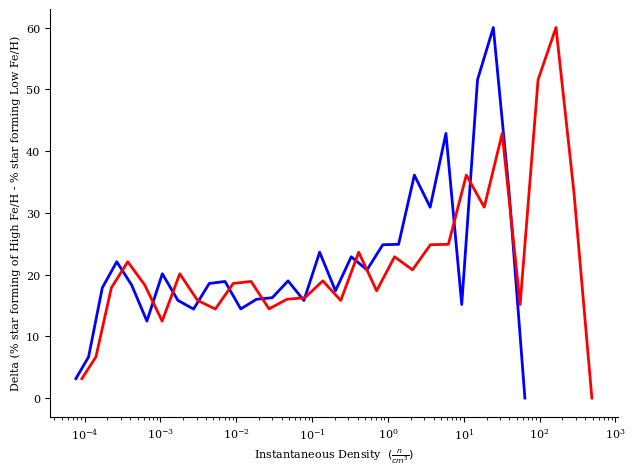

In [20]:
delta = frac_counts_high_feh - frac_counts_low_feh

fig, ax = plt.subplots()

ax.plot(bin_middles_low_feh, (delta*100), color='blue', linewidth = 2)
ax.plot(bin_middles_high_feh, (delta*100), color='red', linewidth = 2)


#snap 200 is 6.432 Gyr
#snap 250 is 8.319 Gyr
#snap 300 is 10.171 Gyr
ax.set_xlabel(r'Instantaneous Density $\ (\frac{n}{cm^{3}})$')
ax.set_ylabel('Delta (% star forming of High Fe/H - % star forming Low Fe/H)')

#ax.set_xlim(5e-5, max_)
#ax.set_ylim(0, 100)
ax.set_xscale('log')


#ax.legend(loc='upper left')

# Customize tick labels
#ax.xaxis.set_major_locator(plt.MultipleLocator(base=np.pi / 2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{int(val/np.pi)}π'))

# Customize fonts and font sizes
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 8

# Customize the plot background and frame
#ax.set_facecolor('lightgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the plot to a file (optional)
#plt.savefig(outpath + 'delta_D_D_feh_both_feh_bins',bbox_inches='tight')
plt.tight_layout()
# Display the plot
plt.show()